In [3]:
from flatspin.model import IsingSpinIce
import matplotlib.pyplot as plt
import numpy as np


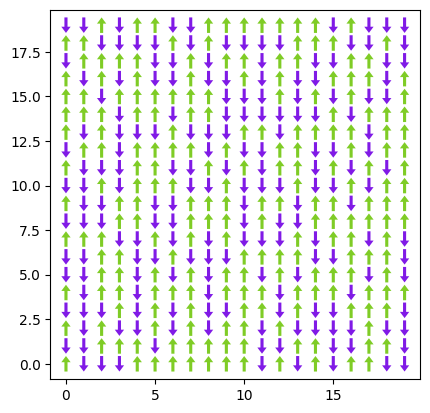

In [4]:
model = IsingSpinIce(size=(20,20), init='random', alpha=1)
model.plot()

In [5]:
e_dip = model.dipolar_energy()
#print(e_dip)

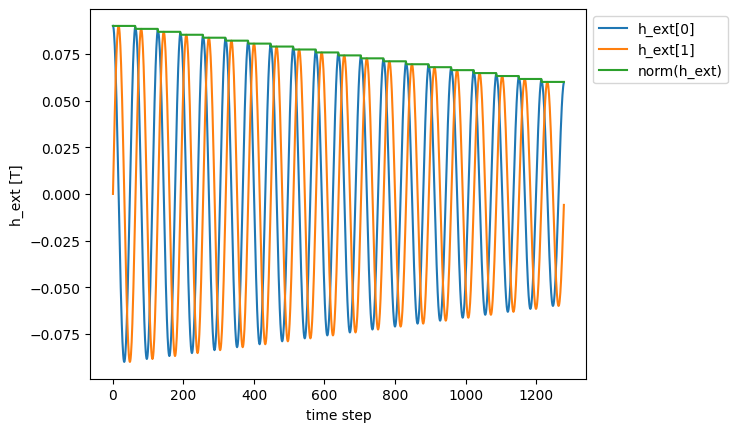

In [6]:
from flatspin.encoder import Rotate

timesteps = 64
enc_rotate = Rotate(H=0.09, H0=0.06, timesteps=timesteps)
input = np.linspace(1, 0, 20)

h_ext = enc_rotate(input)
H = np.linalg.norm(h_ext, axis=1)

plt.plot(h_ext[:,0], label="h_ext[0]")
plt.plot(h_ext[:,1], label="h_ext[1]")
plt.plot(np.linalg.norm(h_ext, axis=1), label="norm(h_ext)")
plt.xlabel("time step")
plt.ylabel("h_ext [T]")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));

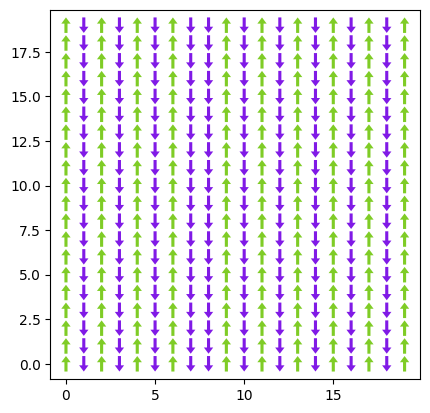

In [7]:
# Record spins, number of spin flips and dipolar energy over time
spins = []
flips = []
E_dip = []
for i, h in enumerate(h_ext):
    model.set_h_ext(h)
    s = model.relax()
    if (i+1) % timesteps == 0:
        # Record spin state at the end of each rotation
        spins.append(model.spin.copy())
    flips.append(s)
    E_dip.append(model.total_dipolar_energy())

model.plot()


[-3.69, -3.69, -3.69, -3.69, -3.69, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.09, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -4.92, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.16, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.34, -5.4, -5.4, -5.4, -5.4, -5.4, -5.4, -5.4, -5.4, -5.4, -5.4, -

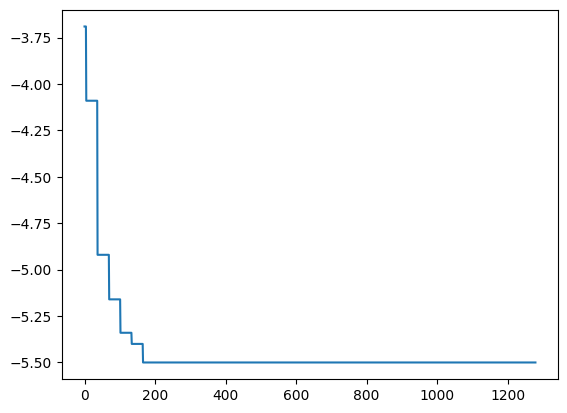

In [8]:
for i in range(len(E_dip)):
    E_dip[i] = E_dip[i]/20**2

print(E_dip)
plt.plot(E_dip)